In [ ]:
from google.colab import files
uploaded = files.upload()


Saving Call Center Data.csv to Call Center Data.csv


In [ ]:
import pandas as pd

df = pd.read_csv("Call Center Data.csv")
df.head()


,Index,Incoming Calls,Answered Calls,Answer Rate,Abandoned Calls,Answer Speed (AVG),Talk Duration (AVG),Waiting Time (AVG),Service Level (20 Seconds)
0,1,217,204,94.01%,13,0:00:17,0:02:14,0:02:45,76.28%
1,2,200,182,91.00%,18,0:00:20,0:02:22,0:06:55,72.73%
2,3,216,198,91.67%,18,0:00:18,0:02:38,0:03:50,74.30%
3,4,155,145,93.55%,10,0:00:15,0:02:29,0:03:12,79.61%
4,5,37,37,100.00%,0,0:00:03,0:02:06,0:00:35,97.30%


In [ ]:
# Remove % sign and convert to float
df['Answer Rate'] = df['Answer Rate'].str.replace('%', '').astype(float)
df['Service Level (20 Seconds)'] = df['Service Level (20 Seconds)'].str.replace('%', '').astype(float)


In [ ]:
import datetime as dt

def time_to_seconds(x):
    t = dt.datetime.strptime(x, "%H:%M:%S")
    return t.hour * 3600 + t.minute * 60 + t.second

df['Answer Speed (Seconds)'] = df['Answer Speed (AVG)'].apply(time_to_seconds)
df['Talk Duration (Seconds)'] = df['Talk Duration (AVG)'].apply(time_to_seconds)
df['Waiting Time (Seconds)'] = df['Waiting Time (AVG)'].apply(time_to_seconds)


In [ ]:
import pandas as pd

df['Date'] = pd.date_range(start='2023-01-01', periods=len(df), freq='D')


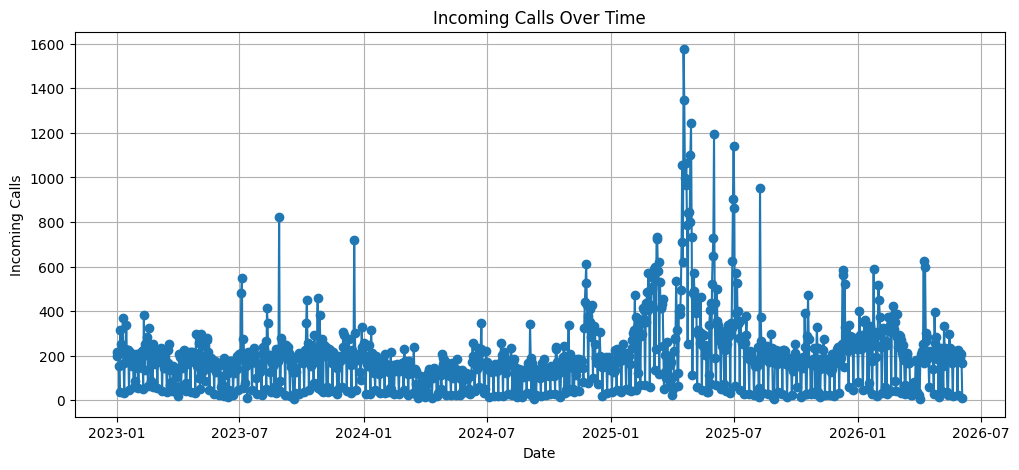

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.plot(df['Date'], df['Incoming Calls'], marker='o')
plt.title("Incoming Calls Over Time")
plt.xlabel("Date")
plt.ylabel("Incoming Calls")
plt.grid(True)
plt.show()


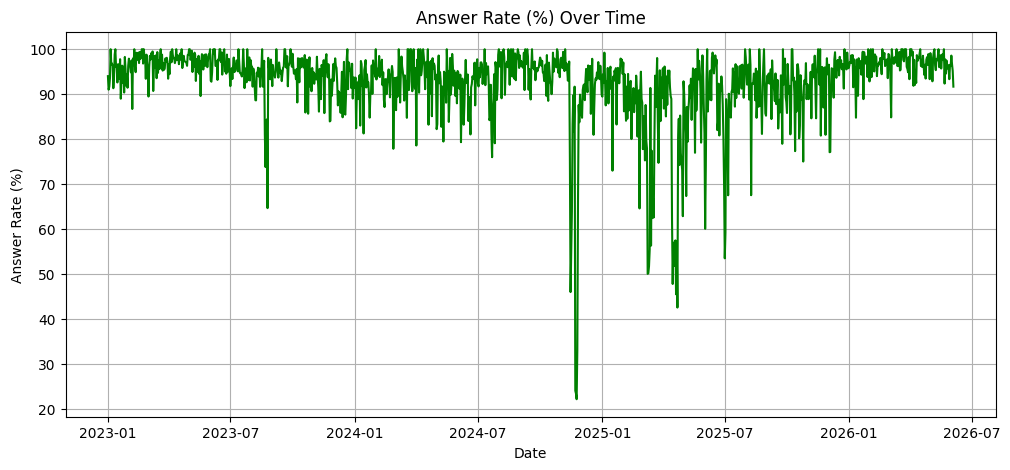

In [ ]:
plt.figure(figsize=(12, 5))
plt.plot(df['Date'], df['Answer Rate'], color='green')
plt.title("Answer Rate (%) Over Time")
plt.xlabel("Date")
plt.ylabel("Answer Rate (%)")
plt.grid(True)
plt.show()


In [ ]:
!pip install prophet


In [ ]:
from prophet import Prophet

# Create new dataframe for Prophet
call_df = df[['Date', 'Incoming Calls']].rename(columns={'Date': 'ds', 'Incoming Calls': 'y'})


In [ ]:
model = Prophet()
model.fit(call_df)


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8bl0g51a/lun74kkj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8bl0g51a/6d2ri0eb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=41465', 'data', 'file=/tmp/tmp8bl0g51a/lun74kkj.json', 'init=/tmp/tmp8bl0g51a/6d2ri0eb.json', 'output', 'file=/tmp/tmp8bl0g51a/prophet_modelhpqcnus2/prophet_model-20250618020911.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:09:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:09:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
# Create future dates
future = model.make_future_dataframe(periods=30)
forecast = model.predict(future)


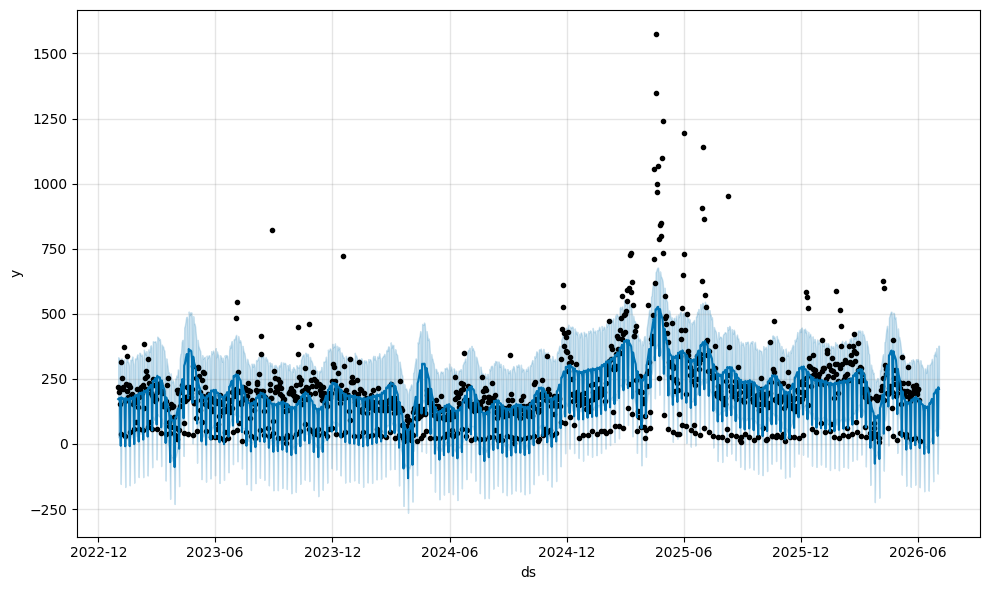

In [ ]:
fig = model.plot(forecast)


In [ ]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(10)


,ds,yhat,yhat_lower,yhat_upper
1271,2026-06-25,1.593161,-143.510823,149.103641
1272,2026-06-26,193.568040,40.944412,341.799035
1273,2026-06-27,192.440064,53.757858,344.904182
1274,2026-06-28,198.124639,53.776095,354.396151
1275,2026-06-29,204.553285,49.931464,337.021127
1276,2026-06-30,209.502144,64.798736,368.491193
1277,2026-07-01,190.207968,54.557715,331.038564
1278,2026-07-02,30.760186,-114.069576,181.135679
1279,2026-07-03,217.833810,70.908321,377.138371
1280,2026-07-04,211.020005,58.123792,377.461095


In [ ]:
# Estimate agents needed (assume 100 calls per agent)
forecast['Agents_Needed'] = (forecast['yhat'] / 100).apply(lambda x: round(x))
forecast[['ds', 'yhat', 'Agents_Needed']].tail(10)


,ds,yhat,Agents_Needed
1271,2026-06-25,1.593161,0
1272,2026-06-26,193.568040,2
1273,2026-06-27,192.440064,2
1274,2026-06-28,198.124639,2
1275,2026-06-29,204.553285,2
1276,2026-06-30,209.502144,2
1277,2026-07-01,190.207968,2
1278,2026-07-02,30.760186,0
1279,2026-07-03,217.833810,2
1280,2026-07-04,211.020005,2


In [ ]:
forecast[['ds', 'yhat', 'Agents_Needed']].to_csv("staffing_forecast.csv", index=False)
from google.colab import files
files.download("staffing_forecast.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>